In [ ]:
import json
import pandas as pd
from tqdm import tqdm
import src.sandbox as sandbox
from datasets import load_dataset
from datasets import Dataset, DatasetDict
from collections import defaultdict, Counter

In [ ]:
# If the dataset is gated/private, make sure you have run huggingface-cli login
ds = load_dataset("Elfsong/Caduceus_v7")

In [ ]:
def test_1(index):
    instance = eval_list[index]
    sb = sandbox.Sandbox()
    results = list()
    
    for index, solution in enumerate(instance['solutions']):        
        sample = {
            "solution": solution['solution'],
            "convert_offline": instance['convert_offline'],
            "evaluate_offline": instance['evaluate_offline'],
            "entry_point": instance['entry_point'],
            "test_cases": json.loads(instance['test_cases']),
            "solution_index": index,
            "timeout": 30
        }
    
        results += [sb.run_sample(sample)]

    return results

In [ ]:
from collections import defaultdict, Counter

failed_sample = defaultdict(list)

for s_index in tqdm(range(256)):
    results = test_1(s_index)
    for index, result in enumerate(results):
        if result['result'] != 'passed':
            print(s_index, result)
            failed_sample[s_index] += [result]

In [ ]:
counter = Counter()

In [ ]:
for instance in ds['eval']:
    l = len(instance['solutions'])
    counter[l] += 1

In [ ]:
n_list, c_list = list(), list()
t_list = list()

for c in counter:
    n_list += [c]
    c_list += [counter[c]]
    t_list += [c] * counter[c]

In [ ]:
len(t_list)

In [ ]:
data = {'count': c_list, 'num_of_solution': n_list}

In [ ]:
df = pd.DataFrame.from_dict(data)

In [ ]:
counter = Counter()
for instance in ds['eval']:
    difficulty = instance['difficulty']
    counter[difficulty] += 1
print(counter)

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

In [ ]:
plt = sns.barplot(data=df, x='num_of_solution', y='count')
plt.set(xlabel=None)

In [ ]:
train_ds = Dataset.from_list(train_list)
eval_ds = Dataset.from_list(eval_list)
final_ds = DatasetDict({"train":train_ds, "eval":eval_ds})

In [ ]:
final_ds.push_to_hub('Elfsong/Caduceus_v7', private=True)

In [ ]:
import statistics

In [ ]:
statistics.mean(t_list)

In [ ]:
statistics.median(t_list)

In [ ]:
statistics.mode(t_list)

In [ ]:
min(t_list)

In [ ]:
max(t_list)

In [ ]:
print('        if not matrix: return []\n        R, C = len(matrix), len(matrix[0])\n        visited = [[False] * C for _ in matrix]\n        dr = [0, 1, 0, -1]\n        dc = [1, 0, -1, 0]\n        ans = []\n        r = c = di = 0\n        for _ in range(R * C):\n            ans.append(matrix[r][c])\n            visited[r][c] = True\n            cr, cc = r + dr[di], c + dc[di]\n            if 0 <= cr < R and 0 <= cc < C and not visited[cr][cc]:\n                r, c = cr, cc\n            else:\n                di = (di + 1) % 4\n                r, c = r + dr[di], c + dc[di]\n        return ans')

In [ ]:
from random import sample 
  
# Prints list of random items of given length 
list1 = [1, 2]  
  
print(sample(list1,3)) 

In [ ]:
a = [2,3,4,5,6,3,2]

In [ ]:
a = sorted(a)

In [ ]:
a

In [ ]:
import json

In [ ]:
f = open('./data/mbpp/sanitized-mbpp.json', 'r')

In [ ]:
data = json.load(f)

In [ ]:
c = 0
for d in data:
    task_id = d['task_id']
    if task_id >= 11 and task_id <= 510:
        c += 1

In [ ]:
import requests

In [ ]:
def get_questions():
    url = "https://leetcode.com/api/problems/algorithms/"
    payload = {}
    headers = {
        'authority': 'leetcode.cn',
        'accept': '*/*',
        'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8,zh-CN;q=0.7,zh-HK;q=0.6,zh-TW;q=0.5,zh;q=0.4',
        'content-type': 'application/json',
        'cookie': '_gid=GA1.2.1098388302.1701430581; gr_user_id=7410146c-e5bc-4739-a7c8-40cb0e580219; a2873925c34ecbd2_gr_session_id=5c028fe5-e819-4177-bc61-685d662a8ea3; a2873925c34ecbd2_gr_session_id_sent_vst=5c028fe5-e819-4177-bc61-685d662a8ea3; Hm_lvt_f0faad39bcf8471e3ab3ef70125152c3=1701430581; _bl_uid=Rtlq0pdemvUjdwuU0mna4wefs90p; csrftoken=AZRVgBFAYbZ8j6ud6Er7hfSUYBoaMMiZyImW25xy9HYJ7Kluvhok6RKzjAofXb3H; LEETCODE_SESSION=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJfYXV0aF91c2VyX2lkIjoiMTgwMDQyMyIsIl9hdXRoX3VzZXJfYmFja2VuZCI6ImRqYW5nby5jb250cmliLmF1dGguYmFja2VuZHMuTW9kZWxCYWNrZW5kIiwiX2F1dGhfdXNlcl9oYXNoIjoiYjg1YTc3ZmYxMDgxNTAwMzg3NzY1YzE3ZGQ0M2I5YTEyYTNhOWYxNWI4YmRhNDVjNjc1ZjFiYmExNGU1YzFmNyIsImlkIjoxODAwNDIzLCJlbWFpbCI6ImR1bWluZ3poZUAxMjYuY29tIiwidXNlcm5hbWUiOiJlbGZzb25nLXYiLCJ1c2VyX3NsdWciOiJlbGZzb25nLXYiLCJhdmF0YXIiOiJodHRwczovL2Fzc2V0cy5sZWV0Y29kZS5jbi9hbGl5dW4tbGMtdXBsb2FkL3VzZXJzL2VsZnNvbmctdi9hdmF0YXJfMTYwMDU0MTMyNy5wbmciLCJwaG9uZV92ZXJpZmllZCI6dHJ1ZSwiX3RpbWVzdGFtcCI6MTcwMTQzMDYzNy4yMjI4ODYsImV4cGlyZWRfdGltZV8iOjE3MDM5NjI4MDAsInZlcnNpb25fa2V5XyI6Mn0.xj1NZG6DUHjo12TmwApzDnzbTIS33WSfKWBAy_UkCJg; a2873925c34ecbd2_gr_last_sent_sid_with_cs1=5c028fe5-e819-4177-bc61-685d662a8ea3; a2873925c34ecbd2_gr_last_sent_cs1=elfsong-v; _ga=GA1.1.695723023.1701430580; Hm_lpvt_f0faad39bcf8471e3ab3ef70125152c3=1701430639; a2873925c34ecbd2_gr_cs1=elfsong-v; _ga_PDVPZYN3CW=GS1.1.1701430580.1.1.1701431322.52.0.0; LEETCODE_SESSION=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.e30.KpufdHIo8CeGduwC5DCQoba8bmWCjJ9mUTYQ4npFdlk; csrftoken=AZRVgBFAYbZ8j6ud6Er7hfSUYBoaMMiZyImW25xy9HYJ7Kluvhok6RKzjAofXb3H',
        'referer': 'https://leetcode.cn/problems/two-sum/submissions/486127358/',
        'sec-ch-ua': '"Google Chrome";v="119", "Chromium";v="119", "Not?A_Brand";v="24"',
        'sec-ch-ua-mobile': '?0',
        'sec-ch-ua-platform': '"macOS"',
        'sec-fetch-dest': 'empty',
        'sec-fetch-mode': 'cors',
        'sec-fetch-site': 'same-origin',
        'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
        'x-csrftoken': 'AZRVgBFAYbZ8j6ud6Er7hfSUYBoaMMiZyImW25xy9HYJ7Kluvhok6RKzjAofXb3H'
    }

    response = requests.request("GET", url, headers=headers, data=payload)
    questions = response.json()
    question_dict= dict()

    for question in questions["stat_status_pairs"]:
        # if not question["paid_only"]:
        slug_name = question["stat"]["question__title_slug"]
        paid_only = question["paid_only"]
        question_dict[slug_name] = paid_only
        
    return question_dict

In [ ]:
train_list = ds['train'].to_list()
eval_list = ds['eval'].to_list()
all_questions = get_questions()

In [ ]:
paid_index = list()
for index, instance in enumerate(train_list):
    slug_name = instance['slug_name']
    if all_questions[slug_name]:
        paid_index += [index]

In [ ]:
for index in paid_index[::-1]:
    del train_list[index]

In [ ]:
paid_index = list()
for index, instance in enumerate(eval_list):
    slug_name = instance['slug_name']
    if all_questions[slug_name]:
        paid_index += [index]

In [ ]:
for index in paid_index[::-1]:
    del eval_list[index]

In [ ]:
len(train_list)

In [ ]:
len(eval_list)

In [ ]:
train_ds = Dataset.from_list(train_list)
eval_ds = Dataset.from_list(eval_list)
final_ds = DatasetDict({"train":train_ds, "eval":eval_ds})

In [ ]:
final_ds.push_to_hub('Elfsong/Caduceus_v8', private=True)

In [ ]:
ds = load_dataset("Elfsong/Caduceus_v8")

In [ ]:
ds

In [ ]:
1633 + 256

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'Difficulty': ['Easy', 'Medium', 'Hard'],
    'Train': [446, 968, 219],
    'Eval': [88, 81, 87]
})

# Create a pie chart for Train
plt.pie(df['Train'], labels=df['Difficulty'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, radius=1)

# Create a pie chart for Eval inside the previous one
plt.pie(df['Eval'], labels=df['Difficulty'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, radius=0.75)

# Draw a white circle at the center
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()

# Equal aspect ratio ensures that pie is drawn as a circle
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

In [ ]:
import json
from datasets import load_dataset
from collections import defaultdict, Counter

In [ ]:
ds = load_dataset("Elfsong/Caduceus_v8")

In [ ]:
slug_name_dict = dict()
for instance in ds['eval']:
    slug_name = instance['slug_name']
    difficulty = instance['difficulty']
    slug_name_dict[slug_name] = difficulty

In [ ]:
with open('./data/deepseek-ai/deepseek-coder-6.7b-instruct_eval.json') as data_f:
    data = json.load(data_f)

In [ ]:
total_a, sum_a = 0, 0
total_e, sum_e = 0, 0
total_m, sum_m = 0, 0
total_h, sum_h = 0, 0

for slug_name in data:
    results = data[slug_name]
    beyonds = [result['beyond_p'] for result in results]
    beyond = max(beyonds[:1])
    
    total_a += 1
    sum_a += beyond
    
    if slug_name_dict[slug_name] == 'Easy':
        total_e += 1
        sum_e += beyond
    elif slug_name_dict[slug_name] == 'Medium':
        total_m += 1
        sum_m += beyond
    elif slug_name_dict[slug_name] == 'Hard':
        total_h += 1
        sum_h += beyond
        
    
final_beyond_a = sum_a / total_a * 100
print(final_beyond_a)

final_beyond_e = sum_e / total_e * 100
print(final_beyond_e)

final_beyond_m = sum_m / total_m * 100
print(final_beyond_m)

final_beyond_h = sum_h / total_h * 100
print(final_beyond_h)

In [ ]:
with open('./data/codellama/CodeLlama-7b-Instruct-hf_eval_new.json') as data_f:
    data = json.load(data_f)
    

for d in ['Easy', 'Medium', 'Hard']:
    status = defaultdict(int)
    for slug_name in data:
        if slug_name_dict[slug_name] == d:
            result = data[slug_name][0]['result']['result']
            status[result] += 1
    print(d)
    print(status)

In [ ]:
53 + 39 + 9

In [ ]:
from datasets import load_dataset

dataset = load_dataset("openai_humaneval")

In [ ]:
cases_sum = 0
for data in dataset['test']:
    test = data['test']
    cases = test.count('assert')
    cases_sum += cases

In [ ]:
cases_sum / 164

In [ ]:
from datasets import load_dataset

dataset_sanitized = load_dataset("mbpp", "sanitized")

In [ ]:
s = 0
for data in dataset_sanitized['test']:
    s += len(data['test_list'])
    
print(s/257)

In [ ]:
from datasets import load_dataset
import json

dataset = load_dataset("codeparrot/apps")

In [ ]:
s = 0
v = 0
for data in dataset['test']:
    # if data['solutions']:
    #     s += len(json.loads(data['solutions']))
    if data['input_output']:
        input_output = json.loads(data['input_output'])

In [ ]:
s / 5000

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = 'YOUR_OPENAI_KEY'

In [ ]:
# Instantiate evaluator with model_name
# Set do_generate to True if you are going to load the specific language model during evaluator initialization.
from src import evaluator as Evaluator
evaluator = Evaluator.DistributeWiseEvaluator(model_name_or_path='bigcode/starcoder2-7b', do_generate=True)

In [ ]:
# Generate code samples
# evaluator.generate(num_samples_per_task=1)

# Evaluate code samples using the Mercury benchmark
evaluator.evaluate(num_samples_per_task=1)

In [ ]:
a = """\nclass Solution(object):\n    def spiralOrder(self, matrix):\n        \"\"\"\n        :type matrix: List[List[int]]\n        :rtype: List[int]\n        \"\"\"\n        \n        if not matrix:\n            return []\n        \n        m = len(matrix)\n        n = len(matrix[0])\n        res = []\n        top = 0\n        bottom = m - 1\n        left = 0\n        right = n - 1\n        \n        while top <= bottom and left <= right:\n            for i in range(left, right + 1):\n                res.append(matrix[top][i])\n            top += 1\n            for i in range(top, bottom + 1):\n                res.append(matrix[i][right])\n            right -= 1\n            if top <= bottom:\n                for i in range(right, left - 1, -1):\n                    res.append(matrix[bottom][i])\n                bottom -= 1\n            if left <= right:\n                for i in range(bottom, top - 1, -1):\n                    res.append(matrix[i][left])\n                left += 1\n        return res"""

In [ ]:
a = "```Given an m x n matrix, return all elements of the matrix in spiral order.\n\n\u00a0\nExample 1:\n\nInput: matrix = [[1,2,3],[4,5,6],[7,8,9]]\nOutput: [1,2,3,6,9,8,7,4,5]\n\n\nExample 2:\n\nInput: matrix = [[1,2,3,4],[5,6,7,8],[9,10,11,12]]\nOutput: [1,2,3,4,8,12,11,10,9,5,6,7]\n\n\n\u00a0\nConstraints:\n\n\n\tm == matrix.length\n\tn == matrix[i].length\n\t1 <= m, n <= 10\n\t-100 <= matrix[i][j] <= 100\n\n\n```\nclass Solution(object):\n    def spiralOrder(self, matrix):\n        \"\"\"\n        :type matrix: List[List[int]]\n        :rtype: List[int]\n        \"\"\"\n        \n        if not matrix:\n            return []\n        \n        m = len(matrix)\n        n = len(matrix[0])\n        res = []\n        i = 0\n        j = 0\n        di = 0\n        dj = 1\n        for _ in range(m*n):\n            res.append(matrix[i][j])\n            if i+di >= m or i+di < 0 or j+dj >= n or j+dj < 0:\n                break\n            if matrix[i+di][j+dj] == 0:\n                break\n            matrix[i+di][j+dj] = 0\n            i += di\n            j += dj\n            if di == 0:\n                di = 1\n                dj = 0\n            elif di == 1:\n                di = 0\n                dj = -1\n            elif di == -1:\n                di = 0\n                dj = 1\n            elif di == 0:\n                di = -1\n                dj = 0\n        return res"

In [ ]:
print(a)

In [ ]:
import itertools
import numpy as np

In [ ]:
def estimate_pass_at_k(num_samples, num_correct, k):
    """Estimates pass@k of each problem and returns them in an array."""

    def estimator(n: int, c: int, k: int) -> float:
        """Calculates 1 - comb(n - c, k) / comb(n, k)."""
        if n - c < k:
            return 1.0
        return 1.0 - np.prod(1.0 - k / np.arange(n - c + 1, n + 1))

    if isinstance(num_samples, int):
        num_samples_it = itertools.repeat(num_samples, len(num_correct))
    else:
        assert len(num_samples) == len(num_correct)
        num_samples_it = iter(num_samples)

    return np.array([estimator(float(n), float(c), k) for n, c in zip(num_samples_it, num_correct)])

In [ ]:
import math

In [ ]:
def cf(n, k):
    return math.gamma(n+1) / (math.gamma(k+1) * (math.gamma(n-k+1)))

def e1(n ,c, k):
    if n - c < k:
        return 1.0
    return 1 - cf(n-c, k) / cf(n, k)

In [ ]:
def e2(n: int, c: int, k: int) -> float:
    """Calculates 1 - comb(n - c, k) / comb(n, k)."""
    if n - c < k:
        return 1.0
    return 1.0 - np.prod(1.0 - k / np.arange(n - c + 1, n + 1))

In [ ]:
e1(5, 0.1, 1)

In [ ]:
e2(5, 4, 1)

In [ ]:
estimate_pass_at_k([5,5,5], [3,2,5], 1)

In [ ]:
ks = [1,3,5]

In [ ]:
if not isinstance(ks, (list, tuple)):
    ks = [ks]

In [ ]:
{f"pass@{k}": estimate_pass_at_k([5,5,5], [3,2,5], 1).mean() for k in ks if ([5,5,5] >= k).all()}

In [ ]:
total = np.array([5,5,5])

In [ ]:
a = {1:1}
b = {2:2}

In [ ]:
import os
import sys
import pynvml as N

MB = 1024 * 1024

def get_usage(device_index, my_pid):
    N.nvmlInit()

    handle = N.nvmlDeviceGetHandleByIndex(device_index)

    usage = [nv_process.usedGpuMemory // MB for nv_process in
             N.nvmlDeviceGetComputeRunningProcesses(handle) + N.nvmlDeviceGetGraphicsRunningProcesses(handle) if
             nv_process.pid == my_pid]

    if len(usage) == 1:
        usage = usage[0]
    else:
        raise KeyError("PID not found")

    return usage

In [ ]:
import torch

In [ ]:
torch.__version__

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

In [ ]:
from datasets import load_dataset

dataset = load_dataset("Elfsong/Mercury")

In [ ]:
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
)

In [ ]:
model = AutoModelForCausalLM.from_pretrained(
    # "deepseek-ai/deepseek-coder-6.7b-instruct",
    # "./checkpoints/checkpoint-200",
    "./checkpoints",
    # quantization_config=bnb_config,
    device_map="cuda:0",
    trust_remote_code=True,
    low_cpu_mem_usage=True,
)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("./checkpoints", legacy=False)

In [ ]:
instance = dataset['eval'][1]

In [ ]:
instance["entry_point"]

In [ ]:
instance["solutions"][0]["solution"]

In [ ]:
input_text = f'{instance["pretty_content"][0]}\n{instance["prompt"]}'
inputs = tokenizer(input_text, return_tensors="pt").to("cuda:0")
outputs = model.generate(**inputs, max_length=1024, pad_token_id=tokenizer.eos_token_id)

In [ ]:
print(tokenizer.decode(outputs[0], skip_special_tokens=True)[len(input_text):])

In [ ]:
from datasets import load_dataset

dataset = load_dataset("Elfsong/Mercury")

In [ ]:
dataset['train'][528]

In [ ]:
!huggingface-cli download codellama/CodeLlama-34b-hf

In [ ]:
!huggingface-cli download bigcode/starcoder2-15b

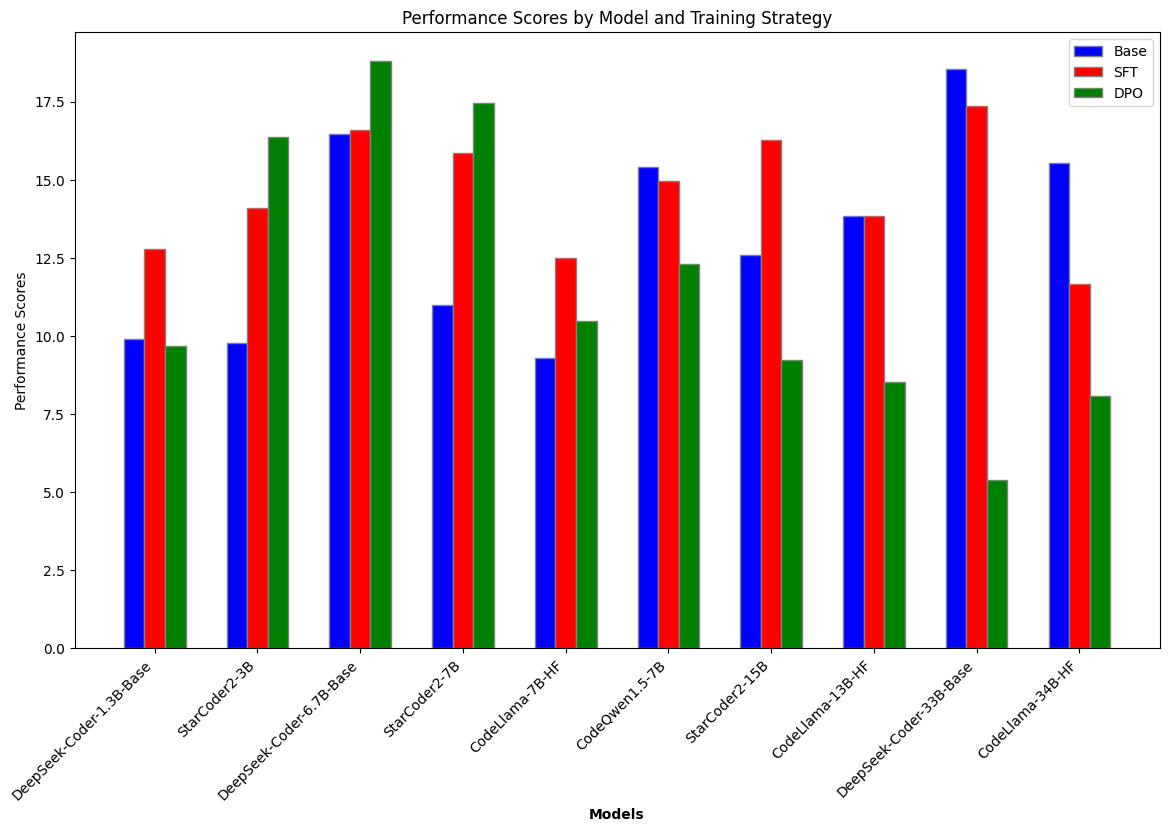

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names and their corresponding performance scores for Base, SFT, and DPO.
models = [
    "DeepSeek-Coder-1.3B-Base", "StarCoder2-3B", "DeepSeek-Coder-6.7B-Base",
    "StarCoder2-7B", "CodeLlama-7B-HF", "CodeQwen1.5-7B", "StarCoder2-15B",
    "CodeLlama-13B-HF", "DeepSeek-Coder-33B-Base", "CodeLlama-34B-HF"
]
base_scores = [9.8900, 9.7648, 16.4505, 11.0023, 9.2986, 15.4003, 12.5994, 13.8361, 18.5516, 15.5372]
sft_scores = [12.7809, 14.0849, 16.6075, 15.8435, 12.5066, 14.9639, 16.2730, 13.8269, 17.3484, 11.6559]
dpo_scores = [9.6807, 16.3823, 18.7910, 17.4637, 10.4908, 12.3153, 9.2181, 8.5135, 5.3844, 8.0684]

# Set up the bar width and positions for the clustered bars.
bar_width = 0.2
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the clustered bar plot.
plt.figure(figsize=(14, 8))
plt.bar(r1, base_scores, color='b', width=bar_width, edgecolor='grey', label='Base')
plt.bar(r2, sft_scores, color='r', width=bar_width, edgecolor='grey', label='SFT')
plt.bar(r3, dpo_scores, color='g', width=bar_width, edgecolor='grey', label='DPO')

# Add labels to the plot.
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models, rotation=45, ha='right')
plt.ylabel('Performance Scores')
plt.title('Performance Scores by Model and Training Strategy')

# Create a legend.
plt.legend()

# Display the plot.
# plt.tight_layout()
plt.show()


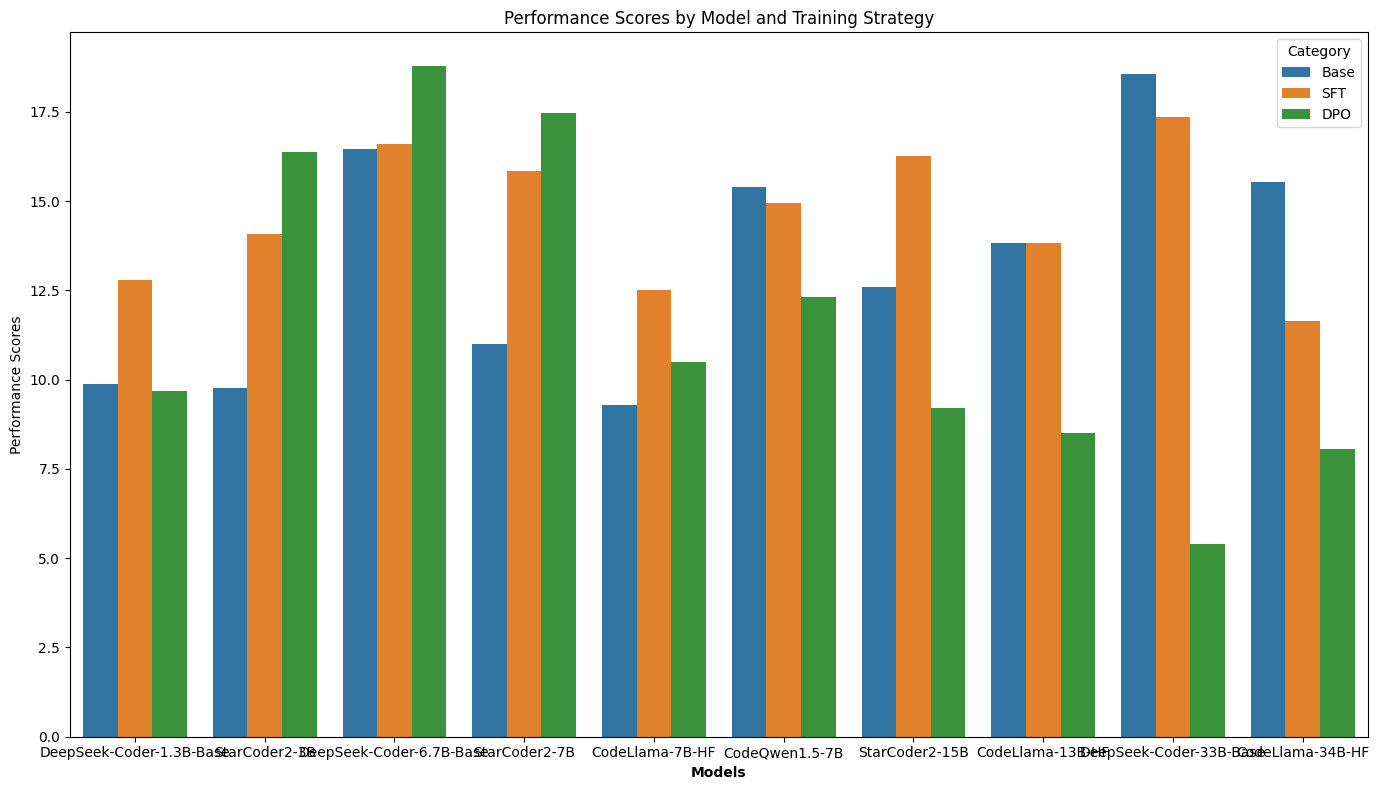

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define model names and their corresponding performance scores for Base, SFT, and DPO.
models = [
    "DeepSeek-Coder-1.3B-Base", "StarCoder2-3B", "DeepSeek-Coder-6.7B-Base",
    "StarCoder2-7B", "CodeLlama-7B-HF", "CodeQwen1.5-7B", "StarCoder2-15B",
    "CodeLlama-13B-HF", "DeepSeek-Coder-33B-Base", "CodeLlama-34B-HF"
]
base_scores = [9.8900, 9.7648, 16.4505, 11.0023, 9.2986, 15.4003, 12.5994, 13.8361, 18.5516, 15.5372]
sft_scores = [12.7809, 14.0849, 16.6075, 15.8435, 12.5066, 14.9639, 16.2730, 13.8269, 17.3484, 11.6559]
dpo_scores = [9.6807, 16.3823, 18.7910, 17.4637, 10.4908, 12.3153, 9.2181, 8.5135, 5.3844, 8.0684]

# Create a DataFrame from the lists
data = {
    'Model': models,
    'Base': base_scores,
    'SFT': sft_scores,
    'DPO': dpo_scores
}
df = pd.DataFrame(data)

# Melt the DataFrame to have a suitable format for Seaborn
df_melted = df.melt(id_vars='Model', var_name='Category', value_name='Score')

# Create the clustered bar plot using Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Score', hue='Category', data=df_melted)

# Add labels to the plot
plt.xlabel('Models', fontweight='bold')
plt.xticks(rotation=0, ha='right', minor=100)
plt.ylabel('Performance Scores')
plt.title('Performance Scores by Model and Training Strategy')

# Display the plot
plt.tight_layout()
plt.show()


In [6]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 12.5 MB/s eta 0:00:00


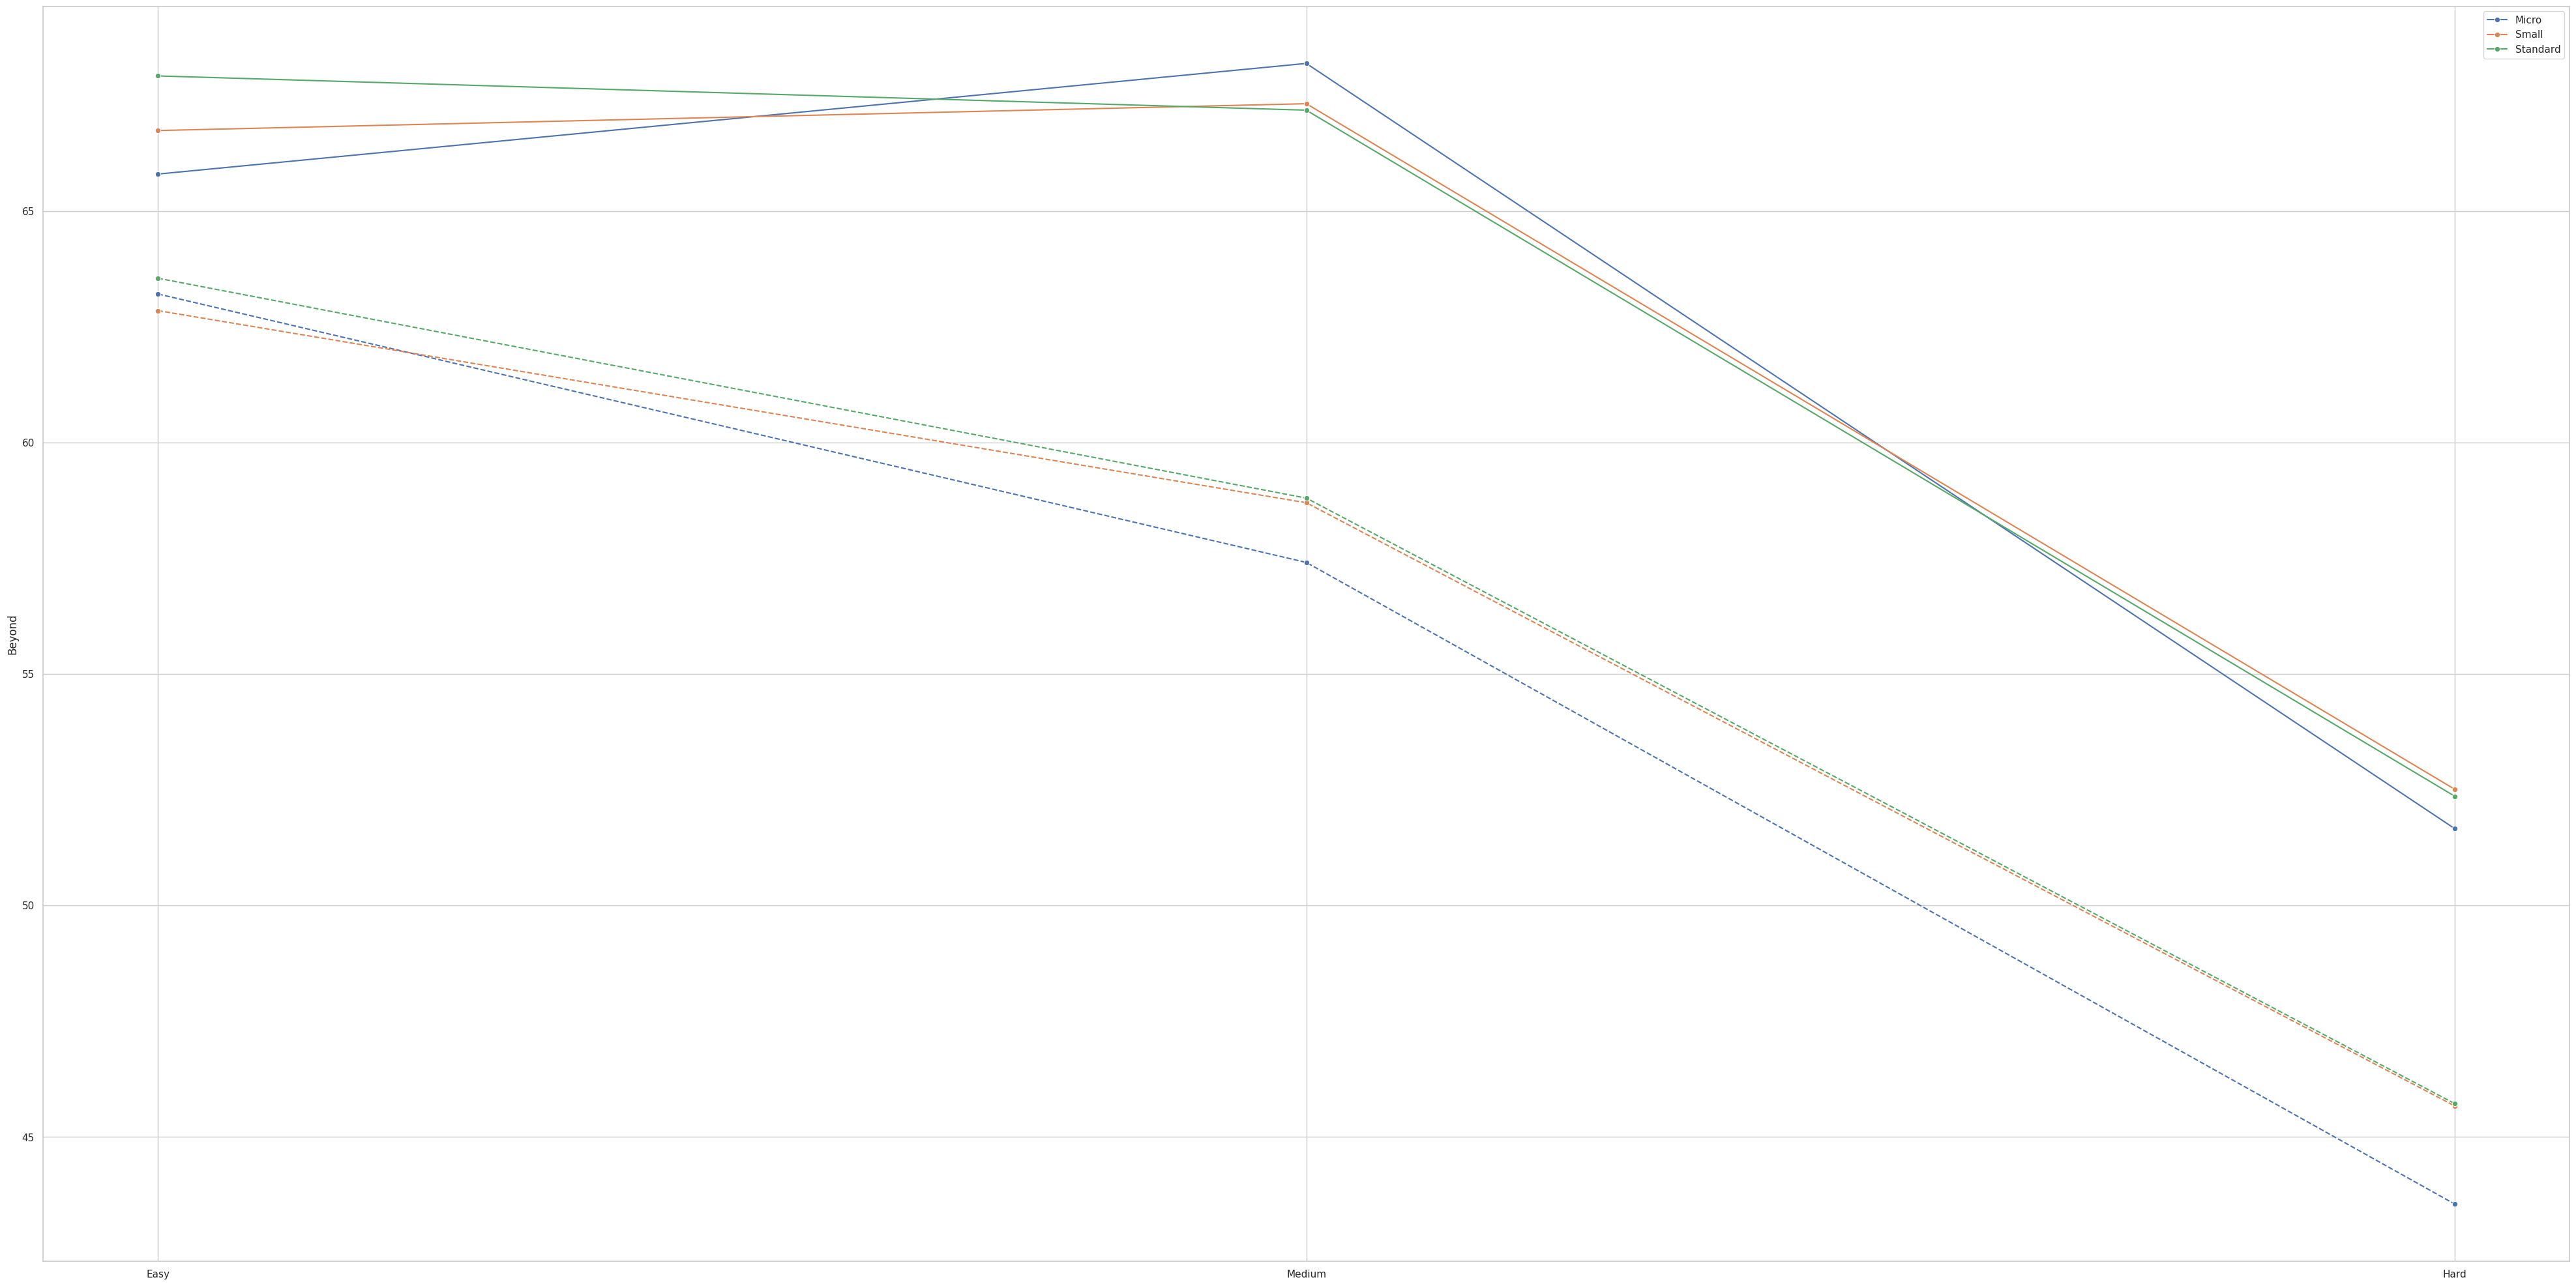

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a dictionary with your data
a_data = {
    'Config': ['Micro', 'Small', 'Standard'],
    'Easy': [65.8, 66.74, 67.92],
    'Medium': [68.19, 67.32, 67.18],
    'Hard': [51.66, 52.51, 52.36]
}

b_data = {
    'Config': ['Micro', 'Small', 'Standard'],
    'Easy': [63.21, 62.85, 63.55],
    'Medium': [57.41, 58.7, 58.8],
    'Hard': [43.55, 45.67, 45.72]
}

# Convert the dictionary into a pandas DataFrame
a_df = pd.DataFrame(a_data)
b_df = pd.DataFrame(b_data)

# Melt the DataFrame so that it is in long-form for seaborn
a_df_long = pd.melt(a_df, id_vars='Config', value_vars=['Easy', 'Medium', 'Hard'], var_name='Difficulty', value_name='Score')
b_df_long = pd.melt(b_df, id_vars='Config', value_vars=['Easy', 'Medium', 'Hard'], var_name='Difficulty', value_name='Score')

# Use seaborn to create the line plot
sns.set_theme(style="whitegrid")  # Set the theme for the plot (optional)
plt.figure(figsize=(5, 2.5))  # Set the size of the figure (optional)

line_plot_a = sns.lineplot(data=a_df_long, x='Difficulty', y='Score', hue='Config', marker='o')
line_plot_b = sns.lineplot(data=b_df_long, x='Difficulty', y='Score', hue='Config', marker='o', linestyle='--')

line_plot_a.set_xlabel('')
line_plot_a.set_ylabel('Beyond')


handles, labels = line_plot_a.get_legend_handles_labels()

handles = [handles[0], handles[1], handles[2]]  # skip every alternate handle to avoid duplicates
labels = [labels[0], labels[1], labels[2]]    # skip every alternate label to have only unique entries

# Add legend to the plot with our custom handles and labels
plt.legend(handles=handles, labels=labels)

# Display the plot
plt.show()